# Apply Grayscale and Black - White contrast on image


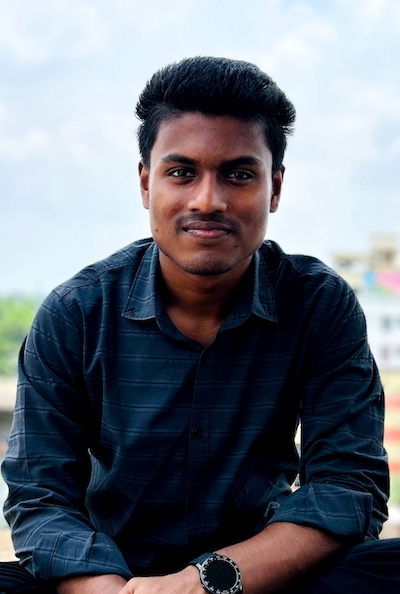

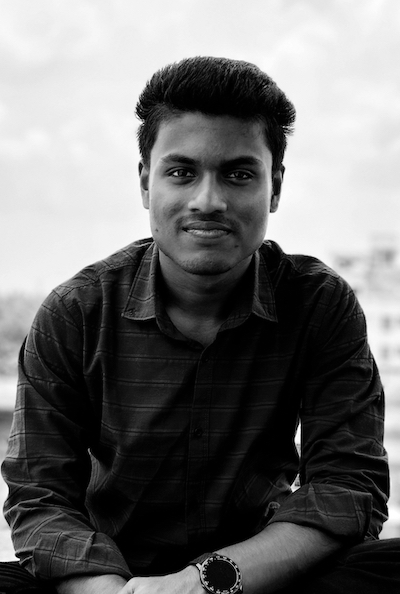

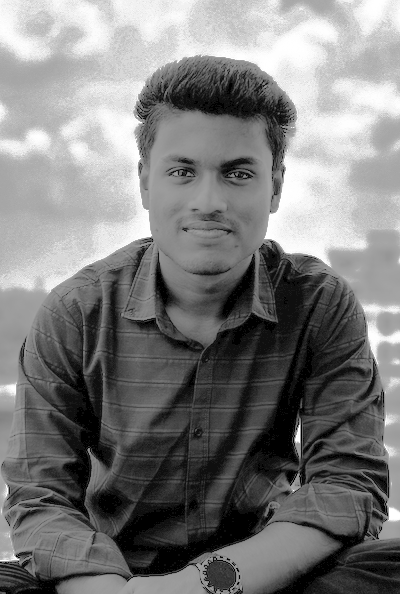

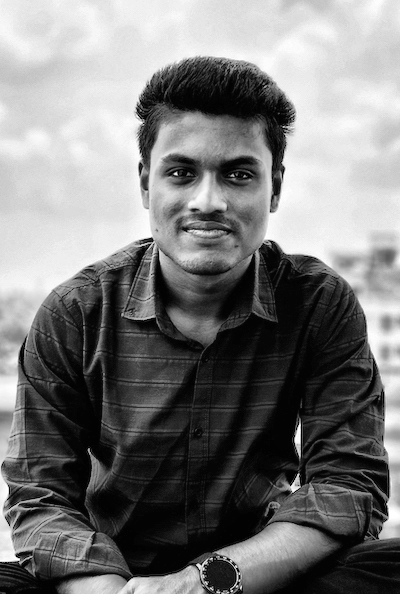

In [17]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def convert_to_black_and_white(image, contrast_enhancement="clahe"):
  """
  Converts a color image to black and white with optional contrast enhancement.

  Args:
      image (np.ndarray): The input color image.
      contrast_enhancement (str, optional): The method for contrast enhancement.
          - "grayscale" (default): Simply converts to grayscale.
          - "equalizehist": Applies histogram equalization.
          - "clahe": Applies Contrast Limited Adaptive Histogram Equalization (CLAHE).

  Returns:
      np.ndarray: The black and white image with optional contrast enhancement.
  """

  # Convert to grayscale
  gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  if contrast_enhancement == "grayscale":
    # No further processing, already grayscale
    black_and_white_image = gray_image
  elif contrast_enhancement == "equalizehist":
    # Apply histogram equalization
    black_and_white_image = cv2.equalizeHist(gray_image)
  elif contrast_enhancement == "clahe":
    # Apply CLAHE
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    black_and_white_image = clahe.apply(gray_image)
  else:
    raise ValueError("Invalid contrast enhancement method. Choose 'grayscale', 'equalizehist', or 'clahe'.")

  return black_and_white_image


# Load the image
image = cv2.imread('joy.jpeg')

# Convert to black and white with different contrast enhancement methods
black_and_white_grayscale = convert_to_black_and_white(image.copy(), contrast_enhancement="grayscale")
black_and_white_equalized = convert_to_black_and_white(image.copy(), contrast_enhancement="equalizehist")
black_and_white_clahe = convert_to_black_and_white(image.copy(), contrast_enhancement="clahe")

# Display the results (you can modify this to show only the desired outputs)

# Original Image
cv2_imshow(image)

# Black & White (Grayscale)
cv2_imshow(black_and_white_grayscale)

# Black & White (Equalized Hist)
cv2_imshow(black_and_white_equalized)

# Black & White (CLAHE)
cv2_imshow(black_and_white_clahe)
cv2.waitKey(0)
cv2.destroyAllWindows()



# Apply Contrast on image


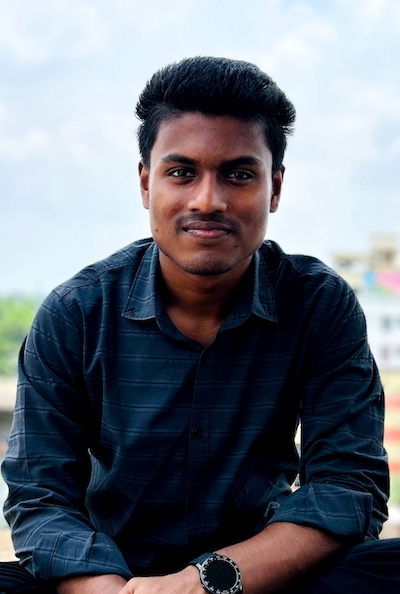

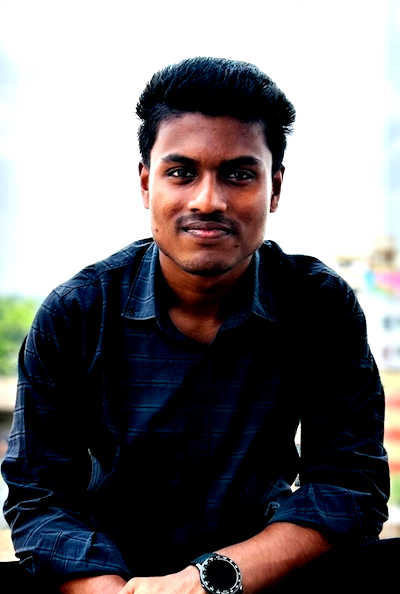

In [8]:
import cv2
import numpy as np


def adjust_contrast(image, contrast_factor):
    """
    Adjusts the contrast of a color image using a contrast factor.

    Args:
        image (np.ndarray): The input color image.
        contrast_factor (float): A value to control the contrast adjustment.
            - Values greater than 1 increase contrast (darker darks, brighter brights).
            - Values between 0 and 1 decrease contrast (grayer image).

    Returns:
        np.ndarray: The image with adjusted contrast.
    """

    mean = np.mean(image, axis=0)  # Calculate mean for each color channel
    # Ensure contrast_factor is within a reasonable range for better control
    contrast_factor = max(0.1, min(10.0, contrast_factor))  # Clamp between 0.1 and 10.0

    adjusted_image = image.copy()
    adjusted_image = (adjusted_image - mean) * contrast_factor + mean

    # Clip pixel values to the valid range (0, 255) to prevent overflows
    adjusted_image = np.clip(adjusted_image, 0, 255).astype(np.uint8)

    return adjusted_image


# Load the image
image = cv2.imread('joy.jpeg')

# Get user input for contrast adjustment
contrast_value = 1.5 #float(input("Enter a contrast value (greater than 1 increases, between 0 and 1 decreases contrast): "))

# Apply contrast adjustment
adjusted_image = adjust_contrast(image, contrast_value)

# Display the original and adjusted images

# Original image
cv2_imshow(image)

# Contrasted image
cv2_imshow(adjusted_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Increase or decrease brightness of a Image

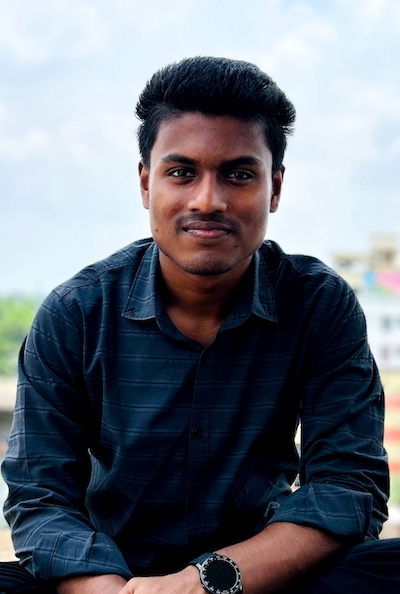

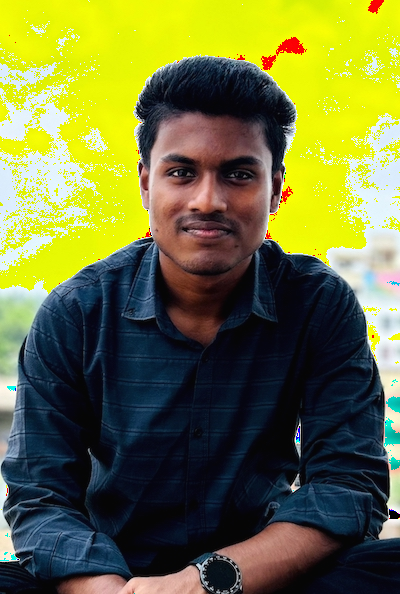

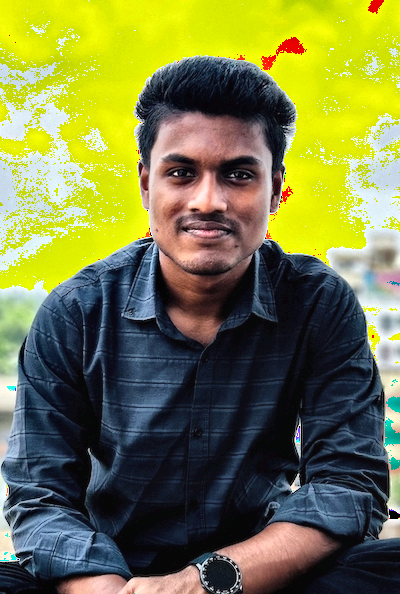

In [16]:
import cv2
import numpy as np


def adjust_brightness(image, brightness_value):
    """
    Adjusts the brightness of a color image using a brightness value.

    Args:
        image (np.ndarray): The input color image.
        brightness_value (int): A value to control the brightness adjustment.
            - Positive values increase brightness.
            - Negative values decrease brightness.

    Returns:
        np.ndarray: The image with adjusted brightness.
    """

    adjusted_image = image.copy()
    adjusted_image = np.add(adjusted_image, brightness_value)
    adjusted_image = np.clip(adjusted_image, 0, 255).astype(np.uint8)

    return adjusted_image


def enhance_local_contrast(image):
    """
    Enhances local contrast in a color image using CLAHE.

    Args:
        image (np.ndarray): The input color image.

    Returns:
        np.ndarray: The image with enhanced local contrast.
    """

    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)  # Convert to LAB color space
    l_channel, a_channel, b_channel = cv2.split(lab_image)
    enhanced_l_channel = clahe.apply(l_channel)  # Apply CLAHE to lightness channel
    lab_image = cv2.merge((enhanced_l_channel, a_channel, b_channel))
    enhanced_image = cv2.cvtColor(lab_image, cv2.COLOR_LAB2BGR)  # Convert back to BGR

    return enhanced_image


# Load the image
image = cv2.imread('joy.jpeg')

# Get user input for brightness adjustment
brightness_value = 5#int(input("Enter a brightness value (positive increases, negative decreases brightness): "))

# Apply adjustments
adjusted_image = adjust_brightness(image, brightness_value)
locally_enhanced_image = enhance_local_contrast(adjusted_image.copy())

# Display the original, adjusted brightness, and locally enhanced images
cv2_imshow(image)
cv2_imshow(adjusted_image)
cv2_imshow(locally_enhanced_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
